# **Predicting Health Insurance Price for an individual or family**

*** Why is this proposal important in today’s world? How predicting a health
insurance cost
accurately can affect the health care/insurance field ?***

*   **COST OPTIMIZATION**:  Accurate prediction helps in setting price based on risk, which helps from driving customers away or  resulting in loss.
*  **HEALTHCARE PLANNING**:support policymakers and providers in planning budget.
*  Helps design personalized plans.
*  Enhances customer satisfaction by offering more predictable pricing.




***If any, what is the gap in the knowledge, or how your proposed method can be helpful if required
in the future for any other type of insurance?***



*  Real-time dynamic pricing is better than Traditional pricing as outdated models or human assumptions may not be more accurate.


*   Using ML to learn relationships from diverse factors (e.g., smoker status, BMI).



**Please aim to identify patterns in the data and important features that may impact an ML model.**





*  AGE:  May increase price with price.

*  BMI: Higher BMI → higher risk → higher charges.

*  Smoker: Major cost factor..

*  Children: Family size may increase cost.


*  Region: May vary in trends.


*  Sex: May not have much impact.



**Target Variable (Dependent Variable)**: Health_insurance_price

# ***Data Understanding or Exploratory data analysis(EDA)***

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading Data set

In [3]:
hdf=pd.read_excel("/content/4021579-Health_insurance_cost (2).xlsx")

viewing top 10 rows

In [4]:
print("First 10 rows of the dataset:")
hdf.head(10)

First 10 rows of the dataset:


,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
5,31.0,female,25.740,0,no,southeast,3756.62160
6,46.0,female,33.440,1,no,southeast,8240.58960
7,37.0,female,27.740,3,no,northwest,7281.50560
8,37.0,male,29.830,2,no,northeast,6406.41070
9,60.0,female,25.840,0,no,northwest,28923.13692


last 10 rows of dataset

In [5]:
print("Last 10 rows of dataset")
hdf.tail(10)

Last 10 rows of dataset


,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1328,23.0,female,24.225,2,no,northeast,22395.74424
1329,52.0,male,38.600,2,no,southwest,10325.20600
1330,57.0,female,25.740,2,no,southeast,12629.16560
1331,23.0,female,33.400,0,no,southwest,10795.93733
1332,52.0,female,44.700,3,no,southwest,11411.68500
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500
1337,61.0,female,29.070,0,yes,northwest,29141.36030


finding random rows in data set

In [6]:
print("Random rows or sample of dataset")
hdf.sample(10)

Random rows or sample of dataset


,age,gender,BMI,Children,smoking_status,location,health_insurance_price
257,38.0,female,40.150,0,no,southeast,5400.98050
603,64.0,female,39.050,3,no,southeast,16085.12750
973,19.0,female,40.500,0,no,southwest,1759.33800
829,39.0,male,21.850,1,no,northwest,6117.49450
389,24.0,female,30.210,3,no,northwest,4618.07990
25,59.0,female,27.720,3,no,southeast,14001.13380
300,36.0,male,27.550,3,no,northeast,6746.74250
293,22.0,female,28.820,0,no,southeast,2156.75180
264,53.0,female,38.060,3,no,southeast,20462.99766
637,35.0,female,38.095,2,no,northeast,24915.04626


Shape of data-set

In [ ]:
hdf.shape

(1338, 7)

Numerical column names

In [7]:
print("Numerical columns are:")
hdf.select_dtypes(include=['number']).columns

Numerical columns are:


Index(['age', 'BMI', 'Children', 'health_insurance_price'], dtype='object')

Categorical column names

In [ ]:
print("categorical columns are:")
hdf.select_dtypes(include=['object']).columns

categorical columns are:


Index(['gender', 'smoking_status', 'location'], dtype='object')

DataTypes of columns

In [ ]:
hdf.dtypes

,0
age,float64
gender,object
BMI,float64
Children,int64
smoking_status,object
location,object
health_insurance_price,float64


Dataset information

In [ ]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


Finding missing values

In [8]:
print("\nMissing Values in Each Column:")
hdf.isnull().sum()


Missing Values in Each Column:


,0
age,28
gender,0
BMI,23
Children,0
smoking_status,0
location,0
health_insurance_price,2


Finding duplicated rows

In [ ]:
hdf.duplicated().sum()

np.int64(1)

Finding Unique values count for each column

In [ ]:
hdf.nunique()

,0
age,47
gender,2
BMI,545
Children,6
smoking_status,2
location,4
health_insurance_price,1335


Printing unique values in each column

In [ ]:
for column in hdf.columns:
    unique_values = hdf[column].unique()
    print(f"Unique values in column '{column}': {unique_values}\n")


Unique values in column 'age': [19. 18. 28. 33. 32. 31. 46. 37. 60. 25. 62. 23. 56. 27. 52. 30. 34. 59.
 nan 55. 22. 63. 26. 35. 24. 41. 38. 36. 21. 48. 40. 58. 53. 43. 64. 20.
 61. 44. 57. 29. 45. 54. 49. 47. 51. 42. 50. 39.]

Unique values in column 'gender': ['female' 'male']

Unique values in column 'BMI': [   nan 33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  27.36
 33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75  28.5
 28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285 37.62
 41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3   38.28
 19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   27.94 

Summary statistics for numerical columns

In [ ]:
print("Summary Statistics:")
hdf.describe()

Summary Statistics:


,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


Summary statistics for categorical columns

In [ ]:
print("\nCategorical Feature Summary:")
print(hdf.describe(include=['object']))


Categorical Feature Summary:
       gender smoking_status   location
count    1338           1338       1338
unique      2              2          4
top      male             no  southeast
freq      676           1064        364


Imbalance check and value count for 'gender' column

In [9]:
gender_counts = hdf['gender'].value_counts()
print("value count of",gender_counts)
print("\nClass Distribution (Imbalance Check for Gender):")
print(hdf['gender'].value_counts(normalize=True) * 100)


value count of gender
male      676
female    662
Name: count, dtype: int64

Class Distribution (Imbalance Check for Gender):
gender
male      50.523169
female    49.476831
Name: proportion, dtype: float64


Imbalance check and value count for 'smoking_status' column



In [10]:
smoking_status_counts = hdf['smoking_status'].value_counts()
print("value count of ",smoking_status_counts)
print("\nClass Distribution (Imbalance Check for smoking_status):")
print(hdf['smoking_status'].value_counts(normalize=True) * 100)

value count of  smoking_status
no     1064
yes     274
Name: count, dtype: int64

Class Distribution (Imbalance Check for smoking_status):
smoking_status
no     79.521674
yes    20.478326
Name: proportion, dtype: float64


kurt Imbalance check  for numerical columns

In [11]:
numeric_columns = hdf.select_dtypes(include=['number'])
for column in numeric_columns:
    kurt = numeric_columns.kurt()
print(f"Kurtosis of column : \n{kurt}\n")


Kurtosis of column : 
age                      -1.245934
BMI                      -0.046949
Children                  0.202454
health_insurance_price    1.609166
dtype: float64



Histogram for numerical columns

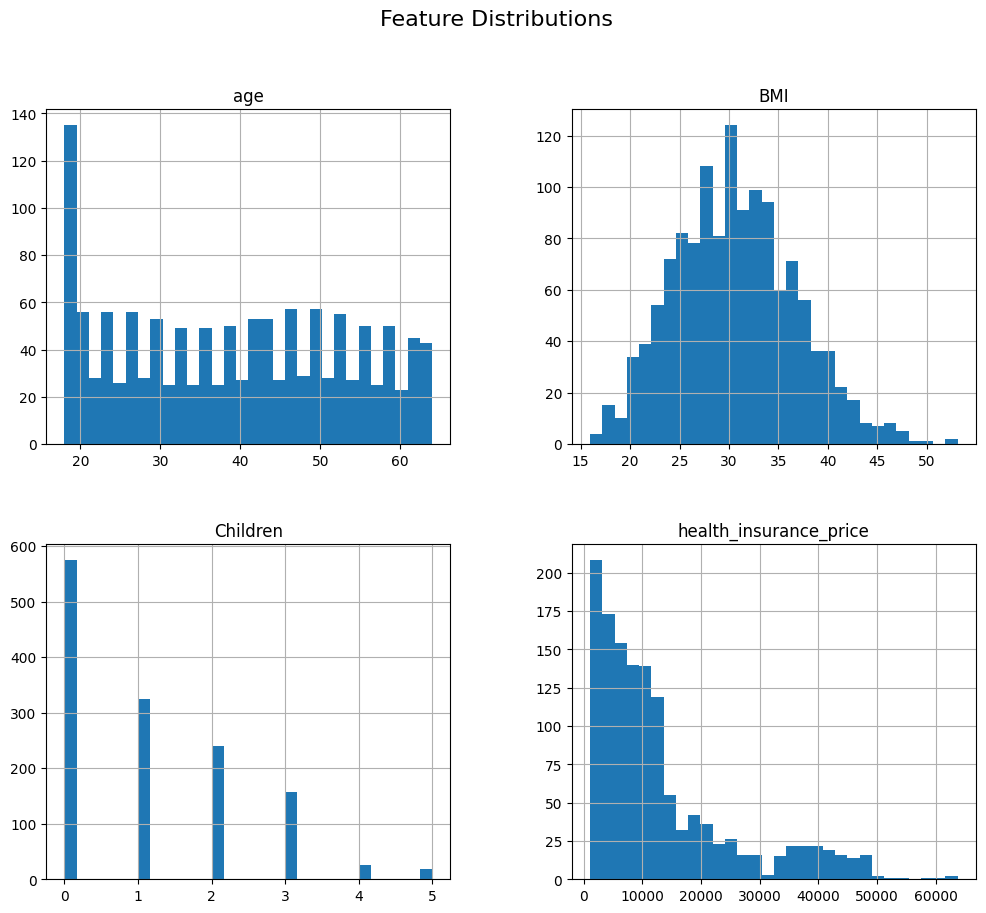

In [ ]:
hdf.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

Countplot for categorical variables

/tmp/ipython-input-317154419.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hdf, x=col, palette="Set2")
/tmp/ipython-input-317154419.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hdf, x=col, palette="Set2")
/tmp/ipython-input-317154419.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hdf, x=col, palette="Set2")


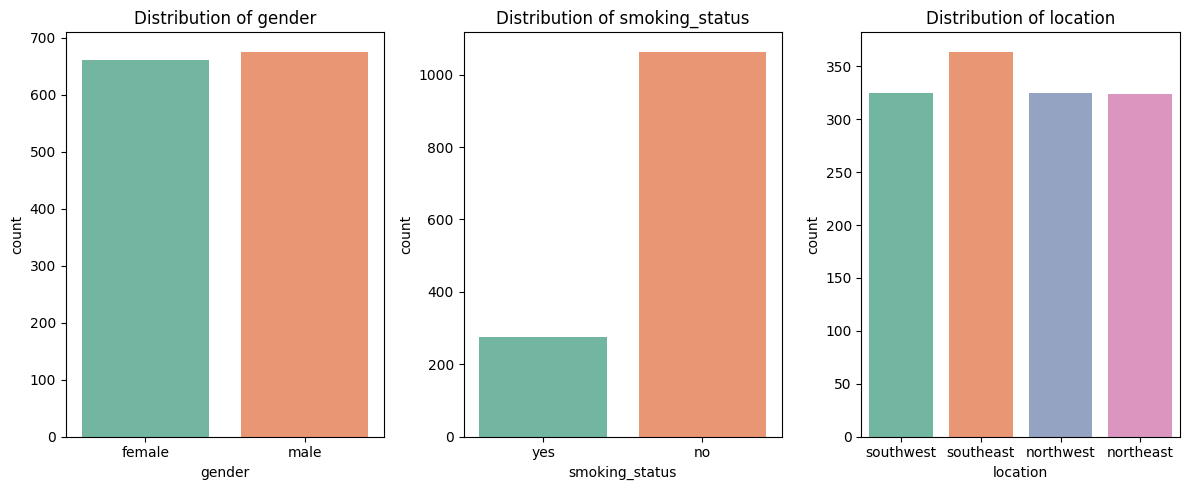

In [ ]:
categorical_features = hdf.describe(include=['object'])
plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=hdf, x=col, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks()
plt.tight_layout()
plt.show()

Boxplot for numerical features to check for outliers

/tmp/ipython-input-1587461176.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hdf, y=col, palette="Set2")
/tmp/ipython-input-1587461176.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hdf, y=col, palette="Set2")
/tmp/ipython-input-1587461176.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hdf, y=col, palette="Set2")
/tmp/ipython-input-1587461176.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for t

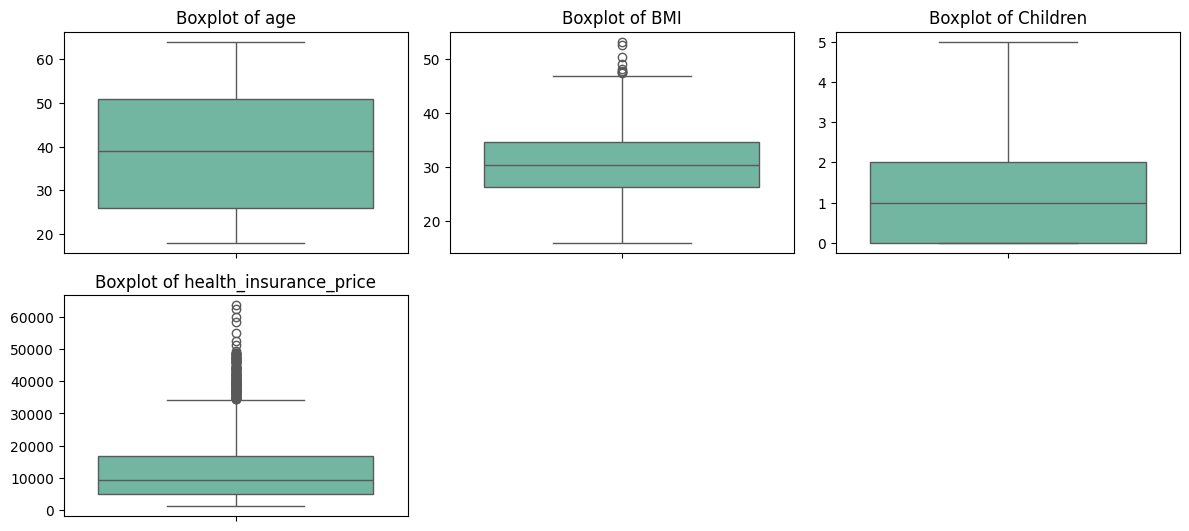

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=hdf, y=col, palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.ylabel("")
plt.tight_layout()
plt.show()

Correlation matrix (only for numerical features)

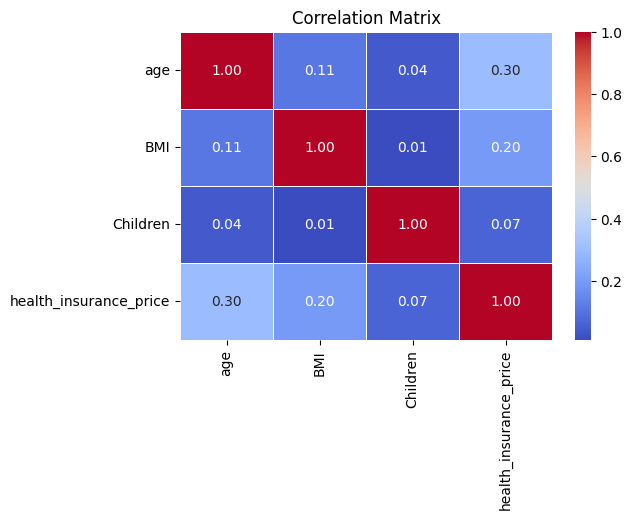

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(hdf.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# **Techniques used:**



*   Correlation matrix to find feature relationships.
*   Boxplot for outliners.
*   Histograms for variable distribution.
*   Countplot for categorical variables.




#  **Data Preprocessing or Data Cleaning**

***Handling Duplicates***

Remove duplicate rows and verification of duplicate removal with help of size

In [13]:
print("Shape before removing duplicates:", hdf.shape)
print("Duplicate Rows:", hdf.duplicated().sum())
hdf = hdf.drop_duplicates()
print("Shape after removing duplicates:", hdf.shape)


Shape before removing duplicates: (1338, 7)
Duplicate Rows: 1
Shape after removing duplicates: (1337, 7)


***Handling Missing Values***

Check missing values before imputation

In [14]:
print("Missing values before imputation:")
print(hdf.isnull().sum())

Missing values before imputation:
age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64


Creating separate copies for different imputation techniques

In [15]:
hdf_mean = hdf.copy()
hdf_mode = hdf.copy()
hdf_median = hdf.copy()
hdf_interpolation = hdf.copy()
hdf_ffill = hdf.copy()
hdf_bfill = hdf.copy()

Retreving Numerical Columns.

In [16]:
numcols=hdf.select_dtypes(include=['number']).columns
numcols
print("Null-values in Numerical columns are:",hdf[numcols].isnull().sum())

Null-values in Numerical columns are: age                       28
BMI                       23
Children                   0
health_insurance_price     2
dtype: int64


Retreving categorical columns.

In [17]:
catcols=hdf.select_dtypes(include=['object']).columns
catcols

Index(['gender', 'smoking_status', 'location'], dtype='object')

Mean Imputation (For numerical columns)



In [18]:
for col in numcols:
    mean_val = hdf_mean[col].mean()
    hdf_mean[col] = hdf_mean[col].fillna(mean_val)

Checking for Null-values after mean imputation on numerical columns.

In [19]:
print("Missing values after mean imputation:")
print(hdf_mean.isnull().sum())

Missing values after mean imputation:
age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


Mode Imputation (For categorical columns)
No Null-values in categorical columns in our data.

In [20]:
for col in catcols:
    mode_val = hdf_mode[col].mode()[0]
    hdf_mode[col] = hdf_mode[col].fillna(mode_val)
# Checking for null-values after mode imputation on categorical columns.
print("Missing values after mode imputation:")
print(hdf_mode.isnull().sum())



Missing values after mode imputation:
age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64


Median Imputation (For numerical columns)

In [21]:
for col in numcols:
    median_val = hdf_median[col].mean()
    hdf_median[col] = hdf_median[col].fillna(median_val)

Checking for Null-values after median imputation on numerical columns.

In [22]:
print("Missing values after median imputation:")
print(hdf_median.isnull().sum())

Missing values after median imputation:
age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


checking for null index's of BMI column before imputation.

In [23]:
BMInull_indexes  = hdf_interpolation[hdf_interpolation['BMI'].isnull()].index
BMInull_indexes

Index([   0,   59,  107,  130,  159,  250,  312,  405,  460,  516,  558,  642,
        709,  739,  767,  836,  933, 1020, 1063, 1107, 1168, 1263, 1323],
      dtype='int64')

Interpolation for numerical columns (Fills missing values using linear interpolation)

In [24]:
for col in numcols:
    ip_val = hdf_interpolation[col].interpolate(method="linear")
    hdf_interpolation[col] = hdf_interpolation[col].fillna(ip_val)

Checking missing values after Interpolation

In [25]:
print("\nMissing values after Interpolation:")
hdf_interpolation.isnull().sum()



Missing values after Interpolation:


,0
age,0
gender,0
BMI,1
Children,0
smoking_status,0
location,0
health_insurance_price,0


Checking for Null index's after imputation.
(Interpolation works between known values)

In [26]:
BMInull_indexes  = hdf_interpolation[hdf_interpolation['BMI'].isnull()].index
BMInull_indexes

Index([0], dtype='int64')

Forward Fill (ffill) - Uses previous value to fill missing values

In [27]:
hdf_ffill = hdf_ffill.fillna(method="ffill")

/tmp/ipython-input-3614433578.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hdf_ffill = hdf_ffill.fillna(method="ffill")


Checking missing values after Forward Fill.

In [28]:
print("\nMissing values after Forward Fill (ffill):")
print(hdf_ffill.isnull().sum())


Missing values after Forward Fill (ffill):
age                       0
gender                    0
BMI                       1
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


Backward Fill (bfill) - Uses next value to fill missing values

In [29]:
hdf_bfill = hdf_bfill.fillna(method="bfill")

/tmp/ipython-input-2826692569.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hdf_bfill = hdf_bfill.fillna(method="bfill")


Checking Missing values after Backward Fill.

In [30]:
print("\nMissing values after Backward Fill (bfill):")
print(hdf_bfill.isnull().sum())


Missing values after Backward Fill (bfill):
age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


find accurate handling method(Mean,Median,Bfill)

In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error

def compare_imputation_methods(hdf, missing_frac=0.1, random_state=0):

    # Step 1: Keep only numeric columns and drop any rows with NaNs
    numeric_df = hdf.select_dtypes(include='number').dropna().copy()
    if numeric_df.empty:
        raise ValueError("No fully observed numeric data available for evaluation.")

    np.random.seed(random_state)
    original_df = numeric_df.copy()
    missing_df = numeric_df.copy()
    numeric_cols = numeric_df.columns

    # Step 2: Inject missing values
    for col in numeric_cols:
        missing_indices = missing_df[col].dropna().sample(frac=missing_frac).index
        missing_df.loc[missing_indices, col] = np.nan

    # Step 3: Imputation methods
    mean_df = missing_df.copy()
    median_df = missing_df.copy()
    bfill_df = missing_df.copy()

    for col in numeric_cols:
        mean_df[col] = mean_df[col].fillna(mean_df[col].mean())
        median_df[col] = median_df[col].fillna(median_df[col].median())
        bfill_df[col] = bfill_df[col].bfill()

    # Step 4: Evaluation helper
    def evaluate(original, imputed, miss_df, cols):
        scores = {}
        for col in cols:
            nan_val = miss_df[col].isnull()
            if nan_val.sum() == 0:
                scores[col] = np.nan
            else:
                scores[col] = mean_absolute_error(original.loc[nan_val, col],
                                                  imputed.loc[nan_val, col])
        return scores

    # Step 5: Compare results
    results = {
        'Mean': evaluate(original_df, mean_df, missing_df, numeric_cols),
        'Median': evaluate(original_df, median_df, missing_df, numeric_cols),
        'Bfill': evaluate(original_df, bfill_df, missing_df, numeric_cols)
    }

    return pd.DataFrame(results)
mae_scores = compare_imputation_methods(hdf)
print(mae_scores)



                               Mean       Median         Bfill
age                       12.403276    12.390625     17.117188
BMI                        4.926016     4.945937      7.147500
Children                   1.005785     0.984375      1.320312
health_insurance_price  8769.655245  7896.097292  12277.554622


***Handling Outliners***

Using 'Median imputed data-set' as it has better performance than other missing value handling methods.

Z-score is not performed because it's usually best to:

Impute with the mean (to match the assumptions Z-score relies on).

Better use IQR-based detection, which is less sensitive to distribution changes and works well with median imputation.



Computing IQR

In [32]:
# Select only numeric columns
numeric_col = hdf_median.select_dtypes(include=['number'])

# Compute IQR
Q1 = numeric_col.quantile(0.25)
Q3 = numeric_col.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers_iqr = ((numeric_col < (Q1 - 1.5 * IQR)) | (numeric_col > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers detected using IQR with median data:\n", outliers_iqr)

numeric_df = hdf.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((numeric_col < (Q1 - 1.5 * IQR)) | (numeric_col > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers detected using IQR with original data :\n", outliers_iqr)


Outliers detected using IQR with median data:
 age                         0
BMI                        11
Children                    0
health_insurance_price    141
dtype: int64

Outliers detected using IQR with original data :
 age                         0
BMI                         9
Children                    0
health_insurance_price    141
dtype: int64


Removing Outliers using IQR (Interquartile Range)

In [33]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_mask = (numeric_col < lower_bound) | (numeric_col > upper_bound)

# Filter out outliers
hdf_iqr = hdf_median[~outliers_mask.any(axis=1)]

print("Original Data Shape:", hdf_median.shape)
print("After IQR Outlier Removal:", hdf_iqr.shape)


Original Data Shape: (1337, 7)
After IQR Outlier Removal: (1190, 7)


Winsorization for Outliners.

In [34]:
from scipy.stats.mstats import winsorize

# Creating an copy of median imputed data-set.
hdf_winsor = hdf_median.copy()

# Apply Winsorization to numerical columns (capping extreme values at 5% and 95%)
for col in hdf.select_dtypes(include=['number']).columns:
    hdf_winsor[col] = winsorize(hdf_median[col], limits=[0.05, 0.05])
# Comparing shape before and after Winsorization.
print("Original Data Shape:", hdf_median.shape)
print("After Winsorization (Capping):", hdf_winsor.shape)

Original Data Shape: (1337, 7)
After Winsorization (Capping): (1337, 7)


***Scaling***

Here by using 'hdf_winsor' data-set because it caps the data and no loss of data.where winsorization is done with Median imputed data-set.

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

#Create separate copies of the dataset for each scaling method
hdf_minmax = hdf_winsor.copy()
hdf_standard = hdf_winsor.copy()
hdf_robust = hdf_winsor.copy()

Selecting only numerical columns for scaling


In [36]:
num_cols = hdf_winsor.select_dtypes(include=['number']).columns

# ***Using Min-Max Scalar with Winsorization for Train_Test and Model selection to train***


# **Data analysis approach:**


**a. What approach are you going to take to prove or disprove your hypothesis?**


*  Exploratory Data Analysis (EDA) is performed. To visually and statistically analyze the relationships between features and insurance charges.



*  Statistical correlation and visual tools like histograms, boxplots, and heatmaps  helped in testing if higher charges are indeed associated with factors like children, higher BMI, and age.


*  Modeling: In machine learning models  identifed features are important  that supports the hypothesis.


**b. What feature engineering techniques will be relevant to your project?**


*   Encoding categorical variables: sex, smoker, and region are encoded using One-Hot Encoding to make them usable in machine learning models.

*  Scaling numerical variables: age, bmi, and children are scaled using StandardScaler, RobustScaler and Min-MaxScaler to normalize their influence, especially for models sensitive to scale like Linear Regression.
*   Handling missing values:age and bmi are imputed with median values.
    charges: rows with missing values are dropped, as it's the target.

**c. Please justify your data analysis approach.**

1.It begins with a data cleaning step, ensuring the dataset is usable and consistent.

2.EDA helps reveal patterns, trends, and outliers in the data, guiding feature selection and transformation.

3.Feature engineering enhances the model ability to understand relationships.

4.Multiple machine learning models are used to validate if the discovered relationships hold true under different algorithms, ensuring robust results.

**d. Identify essential patterns in your data using the EDA approach to justify your findings.**







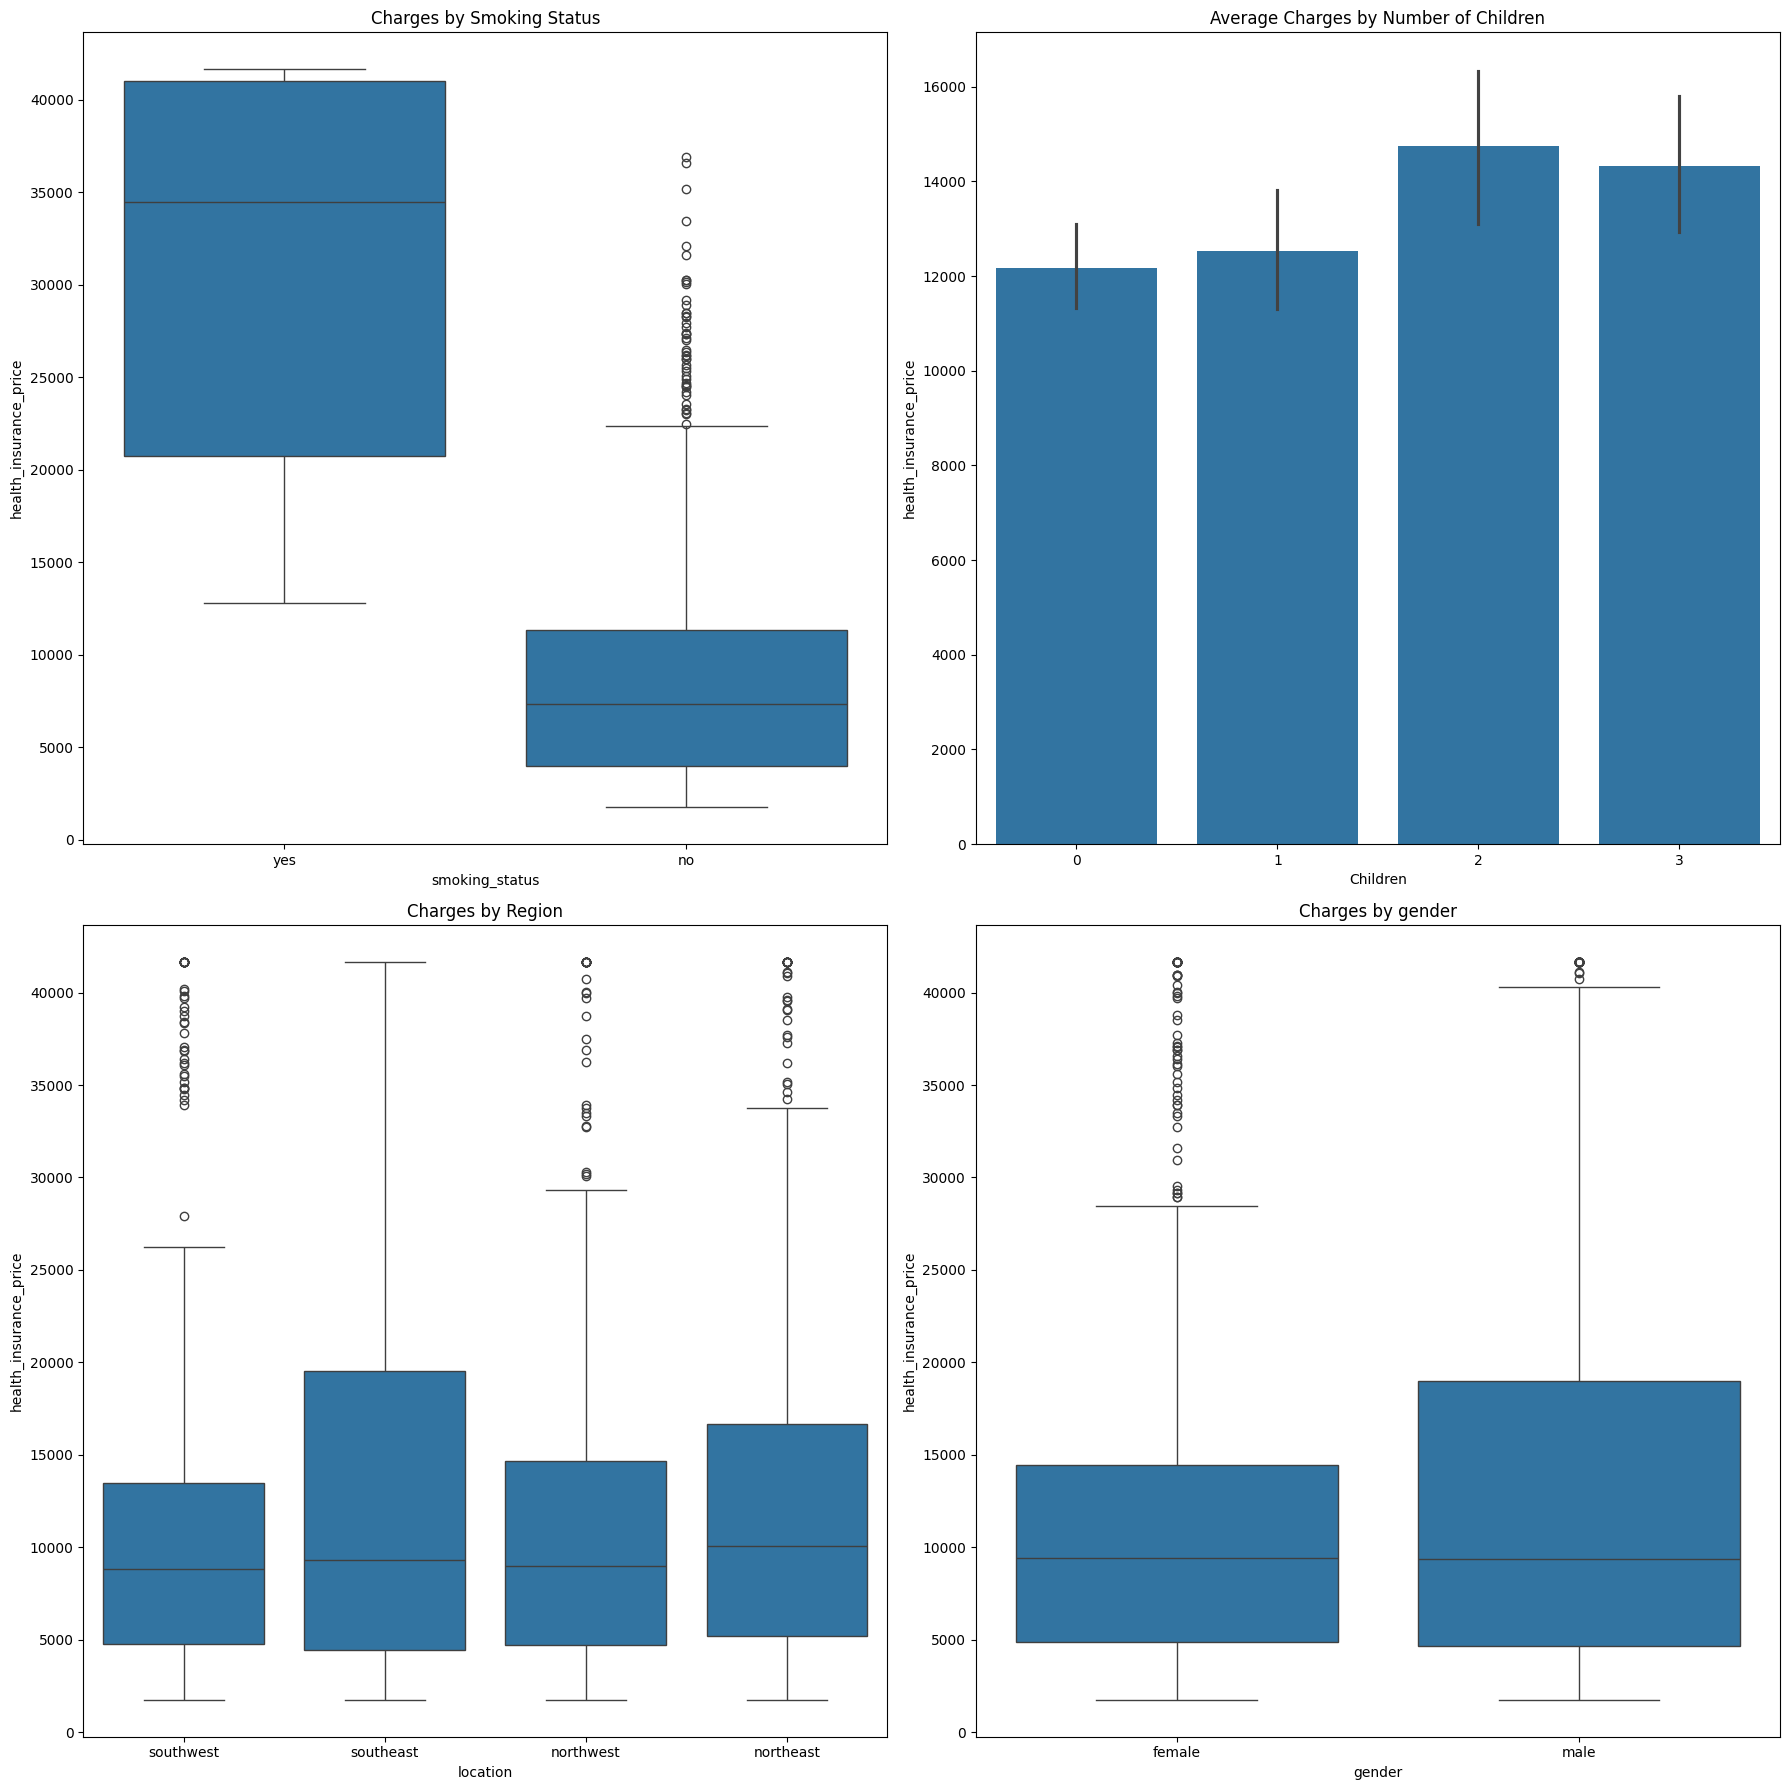

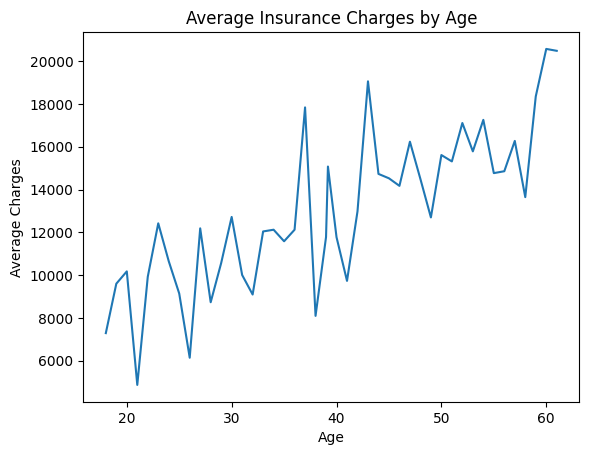

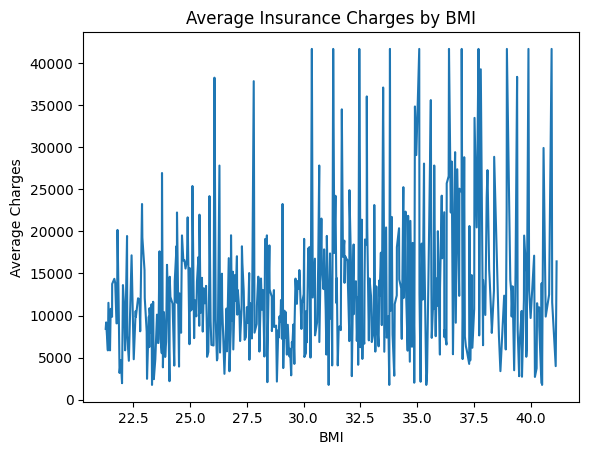

In [45]:
# Create plots
fig, axes = plt.subplots(2, 2, figsize=(18, 18))

#  Charges by Smoking Status
sns.boxplot(data=hdf_robust, x='smoking_status', y='health_insurance_price', ax=axes[0, 0])
axes[0, 0].set_title('Charges by Smoking Status')

# Average Charges by Number of Children
sns.barplot(data=hdf_robust, x='Children', y='health_insurance_price', estimator=np.mean, ax=axes[0, 1])
axes[0, 1].set_title('Average Charges by Number of Children')

# Charges by Region
sns.boxplot(data=hdf_robust, x='location', y='health_insurance_price', ax=axes[1, 0])
axes[1, 0].set_title('Charges by Region')

#  Charges by Sex
sns.boxplot(data=hdf_robust, x='gender', y='health_insurance_price', ax=axes[1, 1])
axes[1, 1].set_title('Charges by gender')

plt.tight_layout()
plt.show()


# Charges by Age (Lineplot)
avg_charges_by_age = hdf_robust.groupby("age")["health_insurance_price"].mean().reset_index()
sns.lineplot(data=avg_charges_by_age, x="age", y="health_insurance_price")
plt.title("Average Insurance Charges by Age")
plt.xlabel("Age")
plt.ylabel("Average Charges")
plt.show()

#  Charges by BMI (Lineplot)
avg_charges_by_age = hdf_robust.groupby("BMI")["health_insurance_price"].mean().reset_index()
sns.lineplot(data=avg_charges_by_age, x="BMI", y="health_insurance_price")
plt.title("Average Insurance Charges by BMI")
plt.xlabel("BMI")
plt.ylabel("Average Charges")
plt.show()


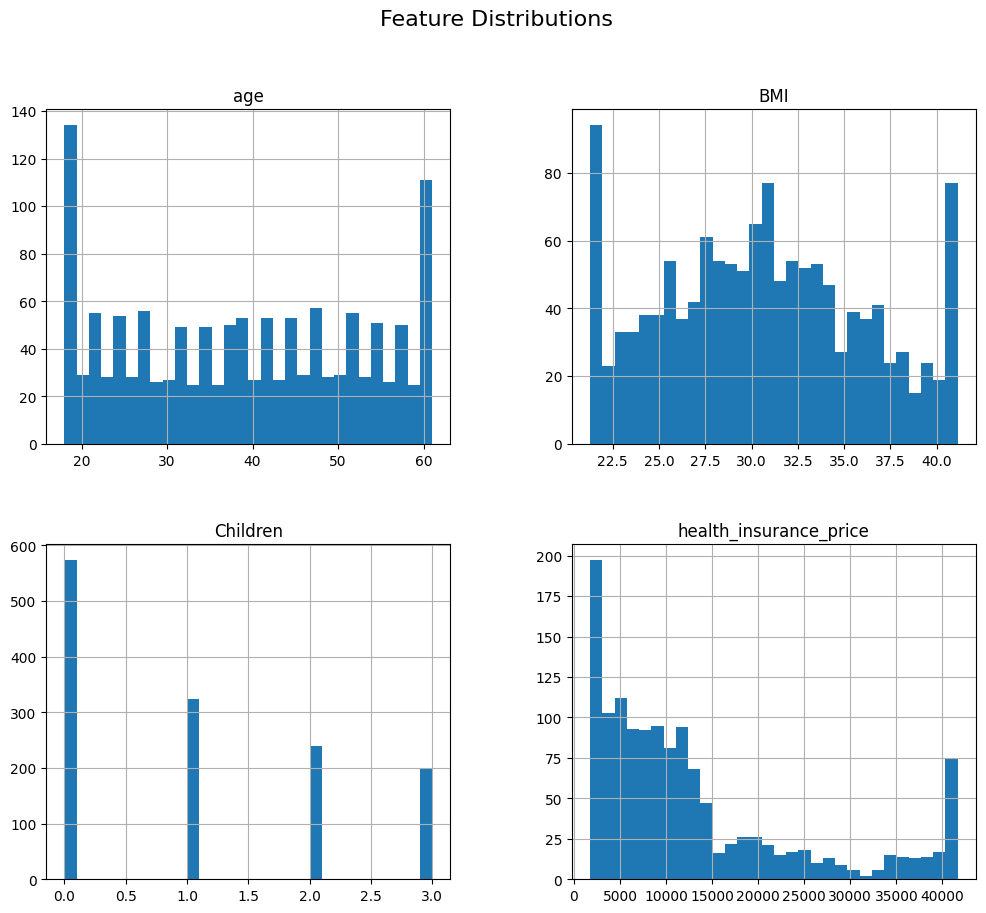

In [46]:
hdf_robust.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# ***Machine learning approach***

**a. What method will you use for machine learning-based predictions of health insurance price?**

Methods Used:
1.Linear Regression          
2.Random Forest          
3.Decision Tree         
4.Polynomial Regression.


**b. Please justify the most appropriate model.**

Random Forest usually perform better due to Capturing non-linearities,
Handling outliers and feature importance well.


**c. Please perform the necessary steps required to improve the accuracy of your model.**

Feature scaling,
Outlier removal.

**d. Please compare all models (at least four models).**

WINSORIZATION DATA FOR SCALING AND MODELING

            Model |  MSE_MINMAX | MSE_STANDARD | MSE_ROBUST

  Decision Tree   |   0.028082 |     0.352753  |  0.352753

  Polynomial Regression|0.019907  |   0.252453  |  0.252453

  Linear Regression  |  0.019745  |   0.242244  |  0.242244

  Random Forest |   0.013888 |     0.170397 |   0.170397





Using Min-Max Scalar with Winsorization for Train_Test and Model selection to train.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import joblib
import pandas as pd

# 1. One-hot encode categorical columns
df_encoded = pd.get_dummies(hdf_minmax, columns=['gender', 'smoking_status', 'location'], drop_first=True)

# 2. Split features and target
X = df_encoded.drop(columns='health_insurance_price')
y = df_encoded['health_insurance_price']

# 3. Train-test split (MUST be before scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale only numerical columns
scaler = MinMaxScaler()
X_train[['age', 'BMI', 'Children']] = scaler.fit_transform(X_train[['age', 'BMI', 'Children']])
X_test[['age', 'BMI', 'Children']] = scaler.transform(X_test[['age', 'BMI', 'Children']])

# 5. Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 6. Save model and scaler
joblib.dump(model, "insurance_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully.")


✅ Model and scaler saved successfully.


In [39]:
import os

print("Model saved:", os.path.exists("insurance_model.pkl"))
print("Scaler saved:", os.path.exists("scaler.pkl"))

Model saved: True
Scaler saved: True


In [ ]:
!ls

'4021579-Health_insurance_cost (2).xlsx'   sample_data
 insurance_model.pkl			   scaler.pkl


Downloading Pickel files to System.

In [40]:
from google.colab import files
files.download("insurance_model.pkl")
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Manual List


In [50]:
test_input = pd.DataFrame([{
    'age': 0.6,
    'BMI': 0.6,
    'Children': 0.0,
    'gender_male': 1,
    'smoking_status_yes': 0,
    'location_northwest': 0,
    'location_southeast': 1,
    'location_southwest': 0
}])

prediction = model.predict(test_input)
print("Predicted Price:", prediction)


Predicted Price: [9566.624406]
